In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'C:/Users/Ravi Designer/Downloads/Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'C:/Users/Ravi Designer/Downloads/Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'C:/Users/Ravi Designer/Downloads/Fruits_Vegetables/Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


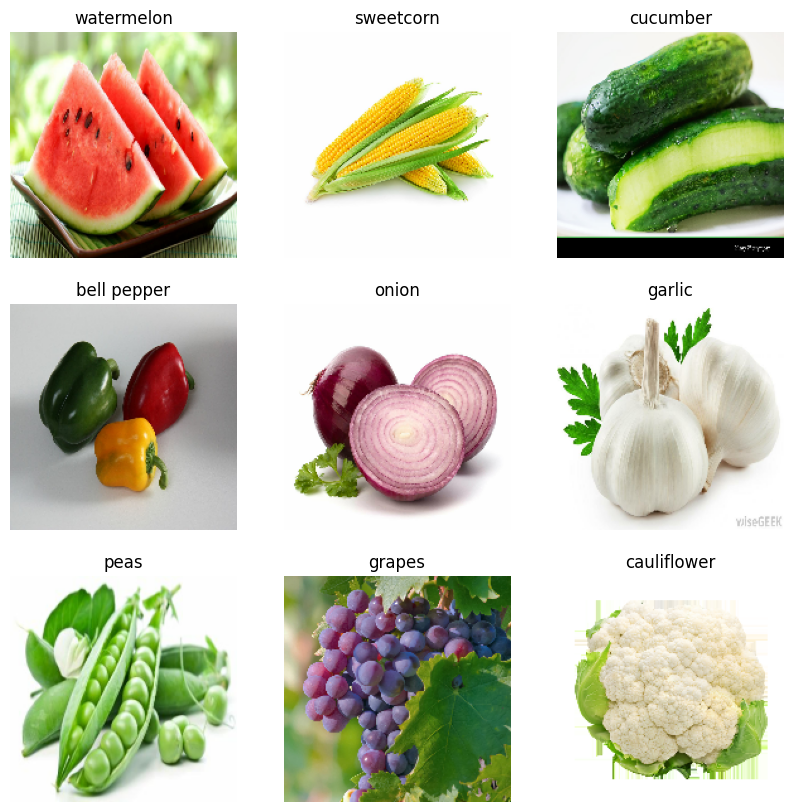

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 368ms/step - accuracy: 0.1242 - loss: 3.2441 - val_accuracy: 0.3476 - val_loss: 2.3409
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.3233 - loss: 2.3054 - val_accuracy: 0.6097 - val_loss: 1.4261
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.5082 - loss: 1.6962 - val_accuracy: 0.7607 - val_loss: 0.8679
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 354ms/step - accuracy: 0.6815 - loss: 1.1059 - val_accuracy: 0.8860 - val_loss: 0.5308
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.8016 - loss: 0.6867 - val_accuracy: 0.8803 - val_loss: 0.5205
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - accuracy: 0.8777 - loss: 0.4476 - val_accuracy: 0.9288 - val_loss: 0.4868
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 369ms/step - accuracy: 0.9319 - loss: 0.2837 - val_accuracy: 0.9373 - val_loss: 0.3623
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.9592 - loss: 0.1830 - val_accu

Text(0.5, 1.0, 'Loss')

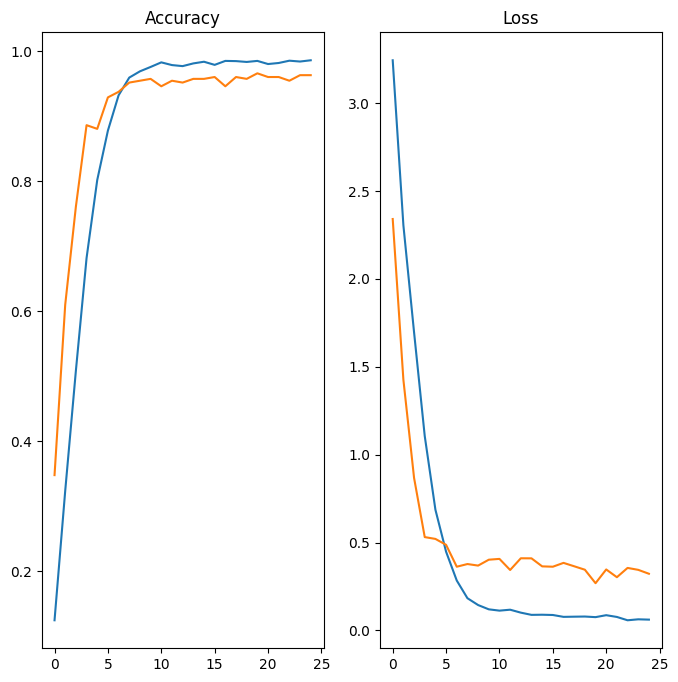

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [18]:
score = tf.nn.softmax(predict)

In [19]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 97.80


In [20]:
model.save('Image_classify.keras')